In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
sns.set_theme()

In [27]:
sns.set(rc={'figure.figsize':(20,9)})

In [3]:
Time_Series_1 = pd.read_csv('Time_Series_1.csv')

In [5]:
Time_Series_1

,CODARTIC,CODIREGG,IMPLINEA,IMPVENTA,CODTAVEN,QCANTDEC,NUMTARJE
0,10254201003449,1,59.99,59.99,2022-06-21001069602336387,1.0,6.008330e+18
1,10234141001560,1,12.72,12.72,2021-08-03001002100821700,1.0,NaN
2,10865290000019,4,11.20,11.20,2022-08-21001009006714129,1.0,6.008330e+18
3,10004136025419,1,48.97,48.97,2022-07-09001003602372694,1.0,NaN
4,10073131011804,1,22.95,22.95,2022-05-14001091203649080,1.0,6.008330e+18
...,...,...,...,...,...,...,...
704350,10271412016641,1,18.90,18.90,2022-02-10001003601776985,1.0,NaN
704351,10411524000184,2,-29.99,-29.99,2022-06-02001009803937030,-1.0,NaN
704352,10092532091505,1,75.00,75.00,2022-05-19001003602477163,1.0,6.008330e+18
704353,10805731000015,2,-12.59,-10.70,2022-02-17001009008963198,-1.0,6.008330e+18


In [6]:
Time_Series_1['Fecha'] = Time_Series_1['CODTAVEN'].str[0:10]

In [7]:
Time_Series_1['Fecha'] = pd.to_datetime(Time_Series_1['Fecha'])

In [9]:
Time_Series_1['Dia'] = Time_Series_1['Fecha'].dt.day

Time_Series_1['Semana'] = Time_Series_1['Fecha'].dt.week

Time_Series_1['Mes'] = Time_Series_1['Fecha'].dt.month

Time_Series_1['Trimestre'] = Time_Series_1['Fecha'].dt.quarter

Time_Series_1['Año'] = Time_Series_1['Fecha'].dt.year

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1132\445753458.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Time_Series_1['Semana'] = Time_Series_1['Fecha'].dt.week


In [12]:
Time_Series_1 = Time_Series_1.loc[: , ['Fecha', 'Dia', 'Semana', 'Mes', 'Trimestre', 'Año', 'IMPVENTA']]

In [13]:
Time_Series_1

,Fecha,Dia,Semana,Mes,Trimestre,Año,IMPVENTA
0,2022-06-21,21,25,6,2,2022,59.99
1,2021-08-03,3,31,8,3,2021,12.72
2,2022-08-21,21,33,8,3,2022,11.20
3,2022-07-09,9,27,7,3,2022,48.97
4,2022-05-14,14,19,5,2,2022,22.95
...,...,...,...,...,...,...,...
704350,2022-02-10,10,6,2,1,2022,18.90
704351,2022-06-02,2,22,6,2,2022,-29.99
704352,2022-05-19,19,20,5,2,2022,75.00
704353,2022-02-17,17,7,2,1,2022,-10.70


## Monthly Time Series

In [16]:
Monthly_Time_Series_1 = Time_Series_1.groupby(['Año', 'Mes'])['IMPVENTA'].sum().reset_index(drop=False)

In [17]:
Monthly_Time_Series_1

,Año,Mes,IMPVENTA
0,2021,6,992891.50
1,2021,7,982142.75
2,2021,8,885289.16
3,2021,9,878563.14
4,2021,10,923552.45
5,2021,11,1527486.61
6,2021,12,1438722.72
7,2022,1,1910816.46
8,2022,2,1317501.34
9,2022,3,1524652.47


Cambiamos las columnas Año y Mes a formato String y creamos la columna Mes-Año

In [18]:
Monthly_Time_Series_1['Año'] = Monthly_Time_Series_1['Año'].astype('string')
Monthly_Time_Series_1['Mes'] = Monthly_Time_Series_1['Mes'].astype('string')

Monthly_Time_Series_1['Mes-Año'] = Monthly_Time_Series_1[['Mes', 'Año']].agg('-'.join, axis=1)

In [19]:
Monthly_Time_Series_1

,Año,Mes,IMPVENTA,Mes-Año
0,2021,6,992891.50,6-2021
1,2021,7,982142.75,7-2021
2,2021,8,885289.16,8-2021
3,2021,9,878563.14,9-2021
4,2021,10,923552.45,10-2021
5,2021,11,1527486.61,11-2021
6,2021,12,1438722.72,12-2021
7,2022,1,1910816.46,1-2022
8,2022,2,1317501.34,2-2022
9,2022,3,1524652.47,3-2022


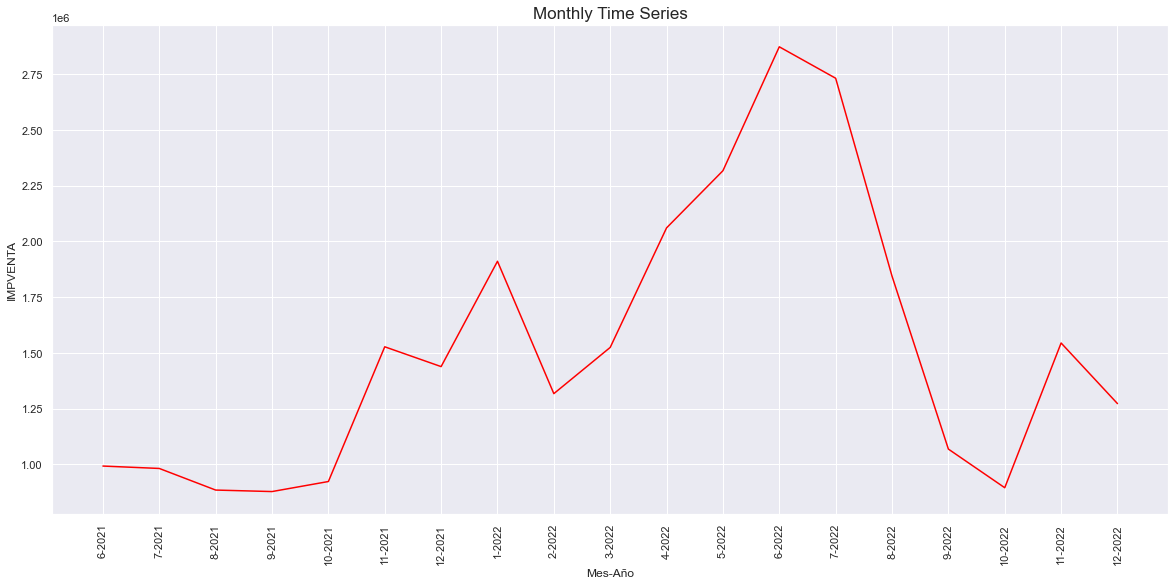

In [28]:
fig, ax = plt.subplots()

p=sns.lineplot(x="Mes-Año", y="IMPVENTA", data=Monthly_Time_Series_1 , color='red')

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Monthly Time Series",  fontsize = 17)

fig.savefig('p1.jpg', format='jpg', dpi=1200)

plt.show()

## Daily Time Series

In [29]:
Daily_Time_Series_1 = Time_Series_1.groupby(['Año', 'Mes','Dia'])['IMPVENTA'].sum().reset_index(drop=False)

In [30]:
Daily_Time_Series_1

,Año,Mes,Dia,IMPVENTA
0,2021,6,1,26423.78
1,2021,6,2,18752.01
2,2021,6,3,22812.84
3,2021,6,4,107889.11
4,2021,6,5,136714.44
...,...,...,...,...
574,2022,12,27,64542.49
575,2022,12,28,59913.84
576,2022,12,29,53815.43
577,2022,12,30,52695.32


In [31]:
Daily_Time_Series_1['Año'] = Daily_Time_Series_1['Año'].astype('string')
Daily_Time_Series_1['Mes'] = Daily_Time_Series_1['Mes'].astype('string')
Daily_Time_Series_1['Dia'] = Daily_Time_Series_1['Dia'].astype('string')

Daily_Time_Series_1['Dia-Mes-Año'] = Daily_Time_Series_1[['Dia', 'Mes', 'Año']].agg('-'.join, axis=1)

In [32]:
Daily_Time_Series_1

,Año,Mes,Dia,IMPVENTA,Dia-Mes-Año
0,2021,6,1,26423.78,1-6-2021
1,2021,6,2,18752.01,2-6-2021
2,2021,6,3,22812.84,3-6-2021
3,2021,6,4,107889.11,4-6-2021
4,2021,6,5,136714.44,5-6-2021
...,...,...,...,...,...
574,2022,12,27,64542.49,27-12-2022
575,2022,12,28,59913.84,28-12-2022
576,2022,12,29,53815.43,29-12-2022
577,2022,12,30,52695.32,30-12-2022


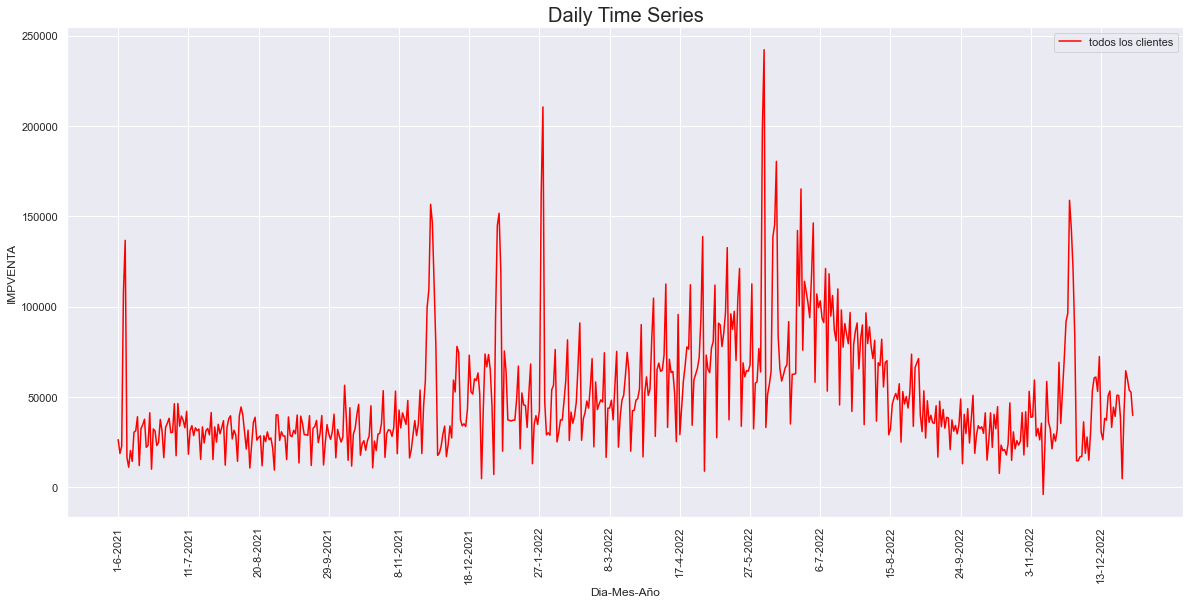

In [47]:
fig, ax = plt.subplots()

p=sns.lineplot(x="Dia-Mes-Año", y="IMPVENTA", data=Daily_Time_Series_1 , color='red', label ="todos los clientes")

p.set_xticks(np.arange(0 , len(Daily_Time_Series_1) , 40))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Daily Time Series", fontsize = 20)

fig.savefig('p2.jpg', format='jpg', dpi=1200)

plt.show()

## Weekly Time Series

In [37]:
Weekly_Time_Series_1 = Time_Series_1.groupby(['Año', 'Mes','Semana'])['IMPVENTA'].sum().reset_index(drop=False)

In [39]:
Weekly_Time_Series_1['Año'] = Weekly_Time_Series_1['Año'].astype('string')
Weekly_Time_Series_1['Mes'] = Weekly_Time_Series_1['Mes'].astype('string')
Weekly_Time_Series_1['Semana'] = Weekly_Time_Series_1['Semana'].astype('string')

Weekly_Time_Series_1['Semana-Mes-Año'] = Weekly_Time_Series_1[['Semana', 'Mes', 'Año']].agg('-'.join, axis=1)

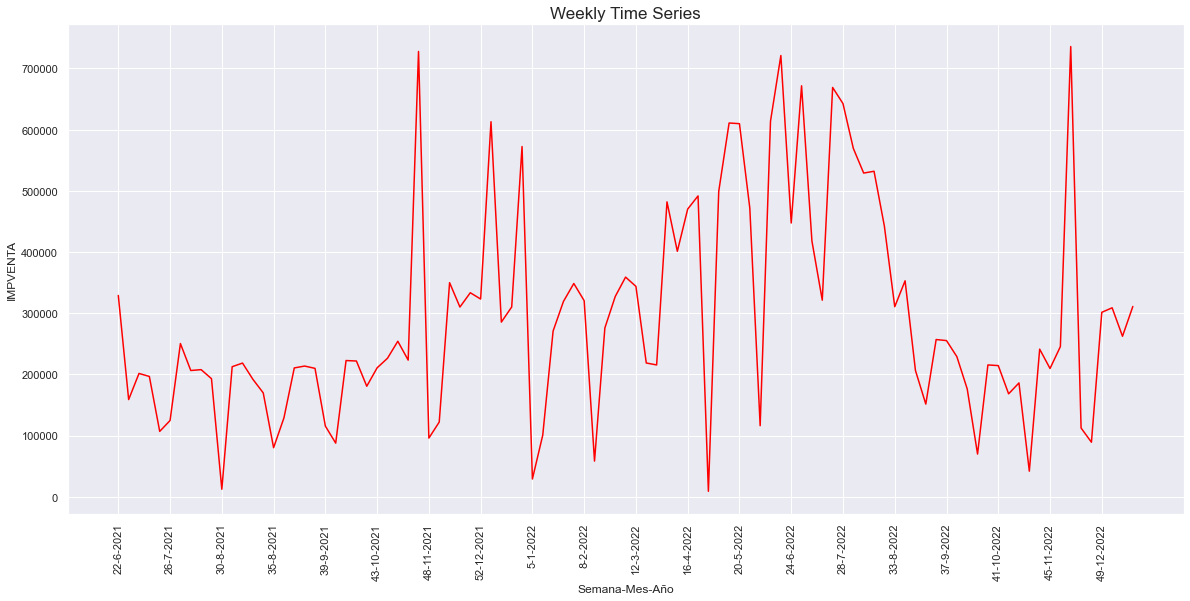

In [40]:
fig, ax = plt.subplots()

p=sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1 , color='red')

p.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

fig.savefig('p3.jpg', format='jpg', dpi=1200)

plt.show()

## Quarter Time Series

In [41]:
Quarter_Time_Series_1 = Time_Series_1.groupby(['Año', 'Trimestre'])['IMPVENTA'].sum().reset_index(drop=False)

In [42]:
Quarter_Time_Series_1

,Año,Trimestre,IMPVENTA
0,2021,2,992891.50
1,2021,3,2745995.05
2,2021,4,3889761.78
3,2022,1,4752970.27
4,2022,2,7249462.41
5,2022,3,5644448.99
6,2022,4,3713061.59


In [43]:
Quarter_Time_Series_1['Año'] = Quarter_Time_Series_1['Año'].astype('string')
Quarter_Time_Series_1['Trimestre'] = Quarter_Time_Series_1['Trimestre'].astype('string')

Quarter_Time_Series_1['Trimestre-Año'] = Quarter_Time_Series_1[['Trimestre', 'Año']].agg('-'.join, axis=1)

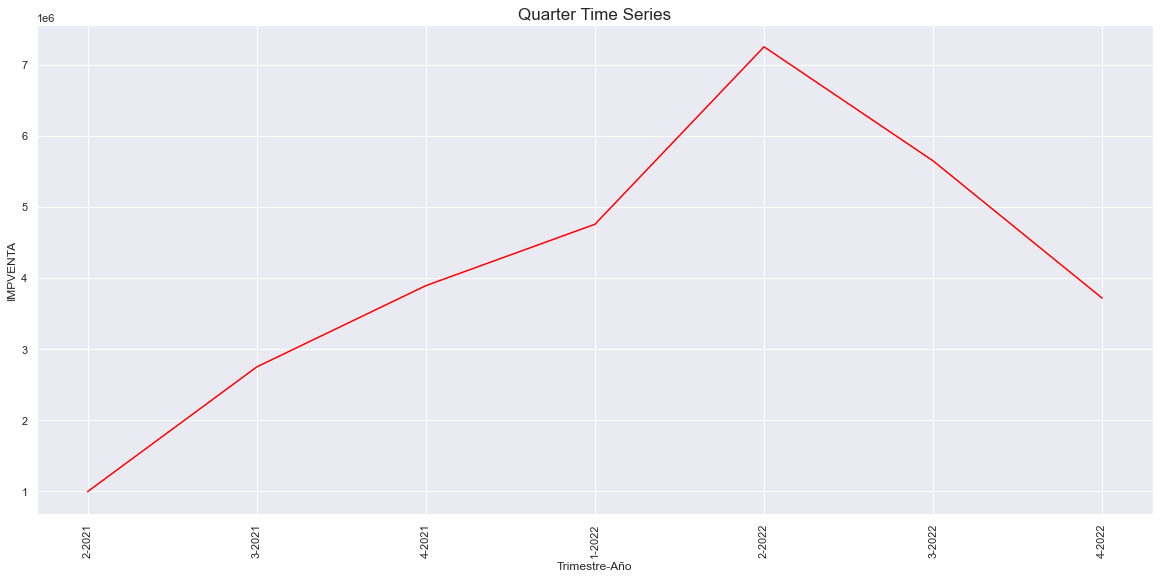

In [46]:
fig, ax = plt.subplots()

p=sns.lineplot(x="Trimestre-Año", y="IMPVENTA", data=Quarter_Time_Series_1 , color='red')

p.set_xticks(np.arange(0 , len(Quarter_Time_Series_1) , 1))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Quarter Time Series",  fontsize = 17)

fig.savefig('p4.jpg', format='jpg', dpi=1200)

plt.show()